In [1]:
import numpy as np
from matplotlib import pyplot, colors, cm

colors.get_named_colors_mapping().update({
    'lfd:signal': "#f28e2b",
    'lfd:a': "#4e79a7",
    'lfd:b': "#59a14f",
    'lfd:retina': "#e15759",
    'lfd:pupil': "#edc948",
})

def sampling_coordinates(n, s):
    return (np.arange(n) - (n-1)/2) * s/n

def spatial_display_to_eye(x_a, x_b, z_a, z_b, z_r, z_f):
    x_r = (1 - z_b/z_f) * z_r/(z_a - z_b) * x_a + (1 - z_a/z_f) * z_r/(z_b - z_a) * x_b
    x_p = z_b/(z_b - z_a) * x_a + xi_r + z_a/(z_a - z_b) * x_b
    return x_r, x_p

def spatial_eye_to_display(x_r, x_p, z_a, z_b, z_r, z_f):
    x_a = (z_a/z_r) * x_r + (1 - z_a/z_f) * x_p
    x_b = (z_b/z_r) * x_r + (1 - z_b/z_f) * x_p
    return x_a, x_b

def frequency_display_to_eye(xi_a, xi_b, z_a, z_b, z_r, z_f):
    xi_r = (z_a/z_r) * xi_a + (z_b/z_r) * xi_b
    xi_p = (1 - z_a/z_f) * xi_a + (1 - z_b/z_f) * xi_b
    return xi_r, xi_p

def frequency_eye_to_display(xi_r, xi_p, z_a, z_b, z_r, z_f):
    xi_a = (1 - z_b/z_f) * z_r/(z_a - z_b) * xi_r + z_b/(z_b - z_a) * xi_p
    xi_b = (1 - z_a/z_f) * z_r/(z_b - z_a) * xi_r + z_a/(z_a - z_b) * xi_p
    return xi_a, xi_b

In the spatial domain we have:
$ \large \begin{align*}
    n &= \text{number of spatial samples} \\
    s &= \text{size of the spatial sampling window} \\
    \Delta x &= \text{spatial sampling period} \\
\end{align*} $

Where their relationship is given by:
$ \large \begin{align*}
    s = n \, \Delta x \\
\end{align*} $

In the frequency domain we have:
$ \large \begin{align*}
    n &= \text{number of frequency samples (same as for spatial samples)} \\
    \sigma &= \text{size of the frequency sampling window (spatial sampling rate)} \\
    \Delta \xi &= \text{frequency sampling period} \\
\end{align*} $

Where their relationship is given by:
$ \large \begin{align*}
    \sigma = n \, \Delta \xi \\
\end{align*} $

The frequency domain relates to the spatial domain according to:
$ \large \begin{align*}
    \sigma &= 1 / \Delta x \\
    \Delta \xi &= 1 / s \\
\end{align*} $

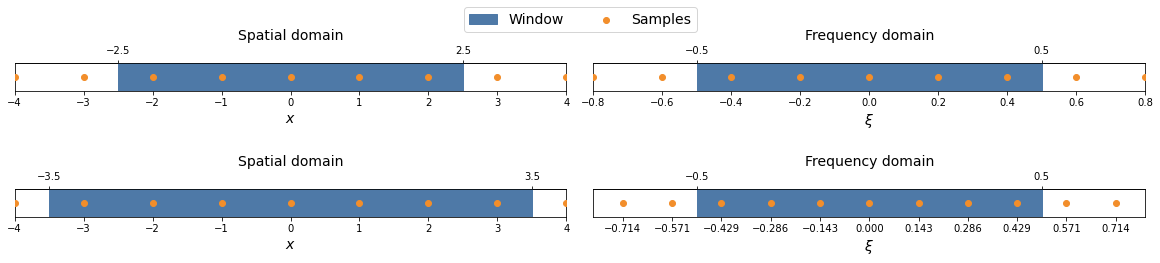

In [2]:
samples_x = sampling_coordinates(9, 9)
samples_xi_1 = sampling_coordinates(15, 3.0)
samples_xi_2 = sampling_coordinates(21, 3.0)

fig, axs = pyplot.subplots(2, 2, constrained_layout=True, figsize=(16, 3.5))

axs[0, 0].set_xticks(samples_x)
axs[0, 0].secondary_xaxis('top').set_xticks([-5/2, 5/2])
axs[0, 0].axvspan(-2.5, 2.5, color='lfd:a', label='Window')
axs[0, 0].scatter(samples_x, [0]*9, color='lfd:signal', zorder=3, label='Samples')

axs[0, 1].set_xticks(samples_xi_1)
axs[0, 1].secondary_xaxis('top').set_xticks([-1/2, 1/2])
axs[0, 1].axvspan(-0.5, 0.5, color='lfd:a')
axs[0, 1].scatter(samples_xi_1, [0]*15, color='lfd:signal', zorder=3)

axs[1, 0].set_xticks(samples_x)
axs[1, 0].secondary_xaxis('top').set_xticks([-7/2, 7/2])
axs[1, 0].axvspan(-3.5, 3.5, color='lfd:a')
axs[1, 0].scatter(samples_x, [0]*9, color='lfd:signal', zorder=3)

axs[1, 1].set_xticks(samples_xi_2)
axs[1, 1].secondary_xaxis('top').set_xticks([-1/2, 1/2])
axs[1, 1].axvspan(-0.5, 0.5, color='lfd:a')
axs[1, 1].scatter(samples_xi_2, [0]*21, color='lfd:signal', zorder=3)

fig.legend(loc='lower center', bbox_to_anchor=(0.5, 0.9), ncol=2, fontsize=14)

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.set_yticks([])

for ax in axs[:, 0]:
    ax.set_xlim(-4.0, 4.0)
    ax.set_ylim(-0.2, 0.2)
    ax.set_title('Spatial domain', fontsize=14)
    ax.set_xlabel(r'$x$', fontsize=14)

for ax in axs[:, 1]:
    ax.set_xlim(-0.8, 0.8)
    ax.set_ylim(-0.04, 0.04)
    ax.set_title('Frequency domain', fontsize=14)
    ax.set_xlabel(r'$\xi$', fontsize=14)

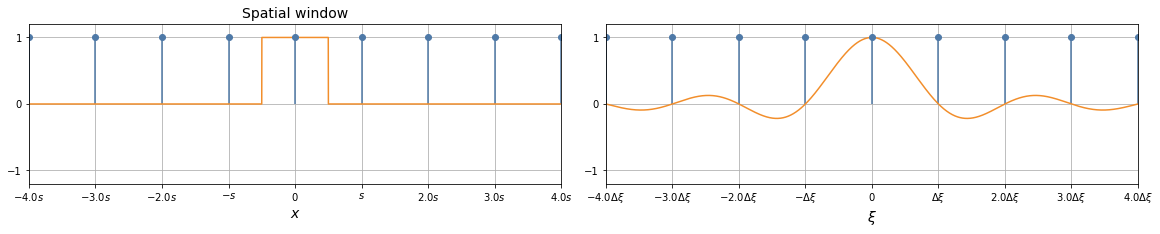

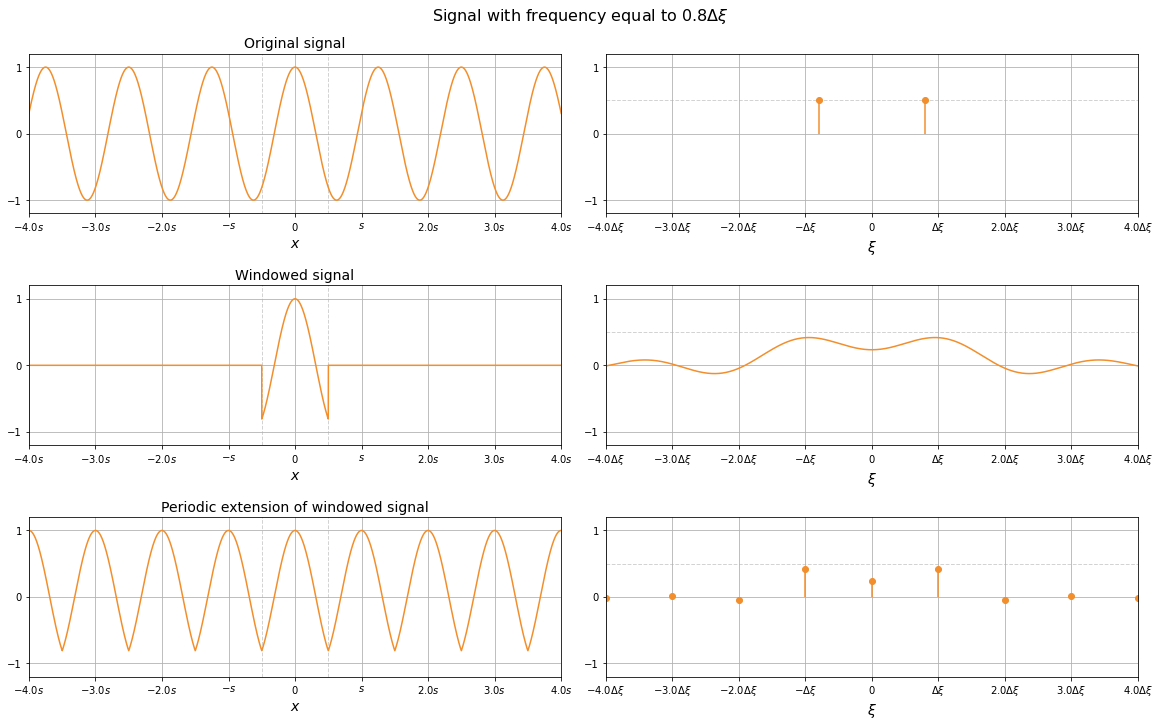

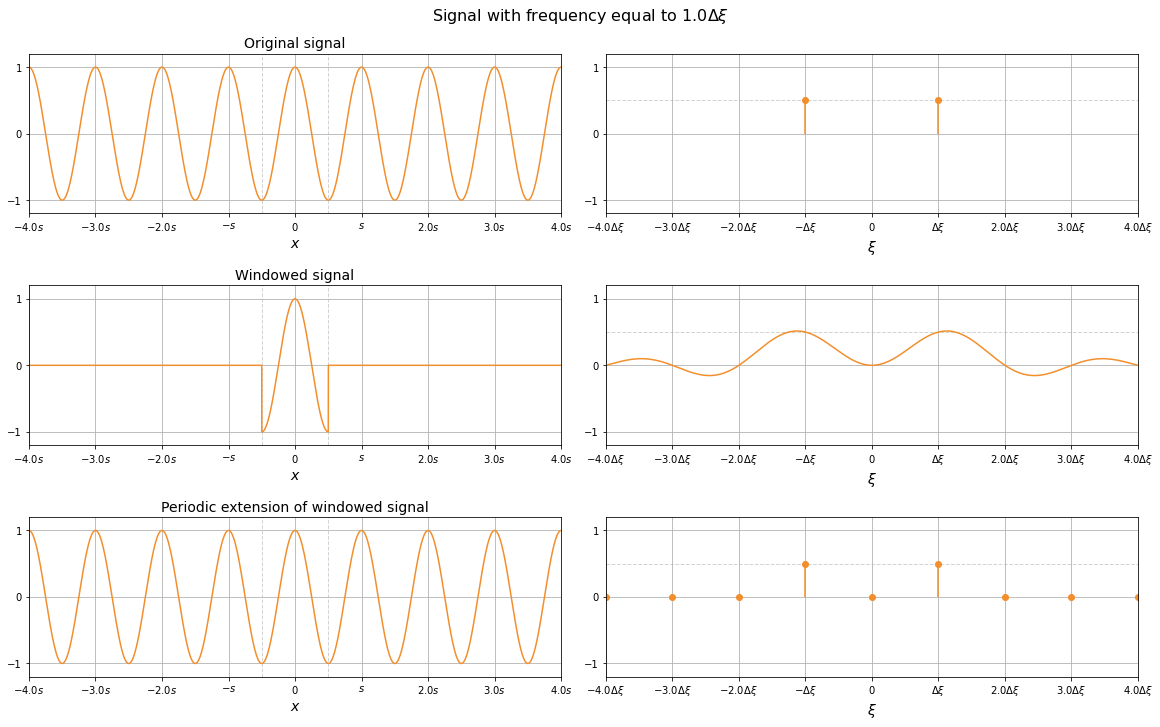

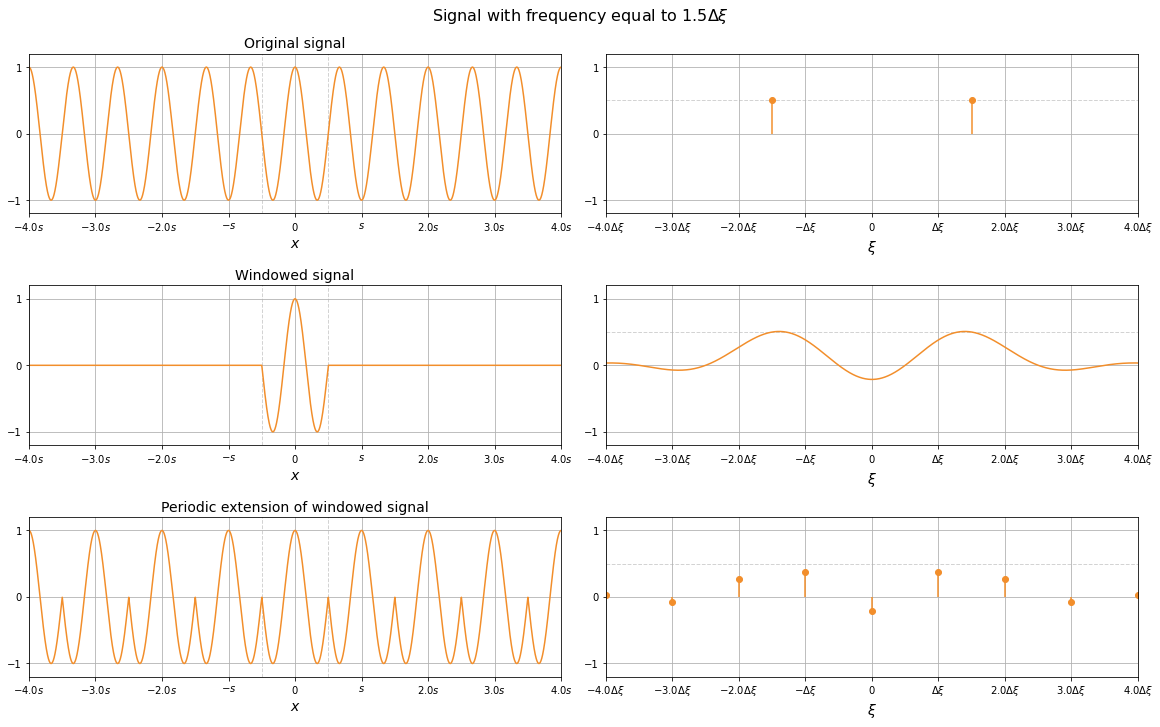

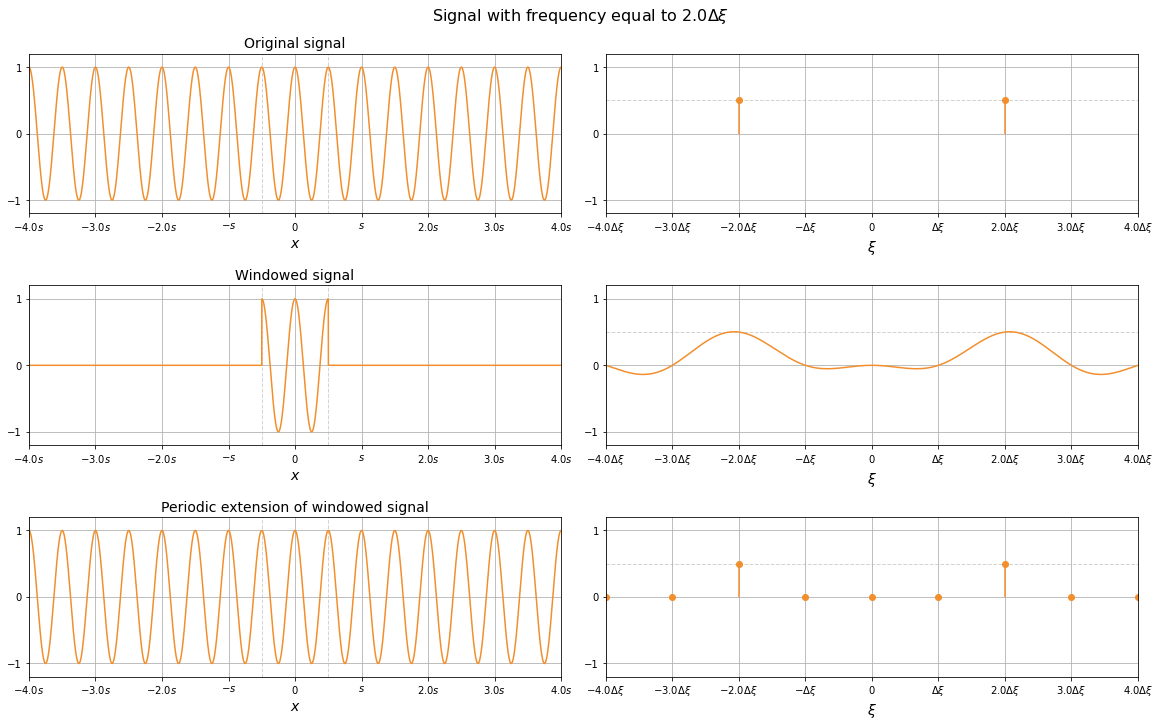

In [3]:
replicas = 9
replica_res = 1001
plot_res = replica_res * replicas

x = sampling_coordinates(plot_res, replicas)
comb = sampling_coordinates(replicas, replicas)

x_labels = [fr'${tick}s$' for tick in comb]
x_labels[replicas//2-1:replicas//2+2] = [r'$-s$', r'$0$', r'$s$']
xi_labels = [fr'${tick}\Delta\xi$' for tick in comb]
xi_labels[replicas//2-1:replicas//2+2] = [r'$-\Delta\xi$', r'$0$', r'$\Delta\xi$']

def spectral_leakage_example(frequency):
    signal = np.cos(2.0 * np.pi * frequency * x)
    windowed_signal = signal * (np.abs(x) < 0.5)
    periodic_signal = np.cos(2.0 * np.pi * frequency * (np.mod(x + 0.5, 1.0) - 0.5))

    fig, axs = pyplot.subplots(3, 2, constrained_layout=True, figsize=(16, 10))
    fig.suptitle(fr'Signal with frequency equal to ${frequency}\Delta\xi$', fontsize=16)

    for ax in axs.flat:
        ax.grid(True)
        ax.set_aspect('equal')
        ax.set_xlim(-4.0, 4.0)
        ax.set_xticks(comb)
        ax.set_ylim(-1.2, 1.2)
        ax.set_yticks([-1.0, 0.0, 1.0])

    for ax in axs[:, 0]:
        ax.set_xlabel(r'$x$', fontsize=14)
        ax.set_xticklabels(x_labels)
        ax.vlines([-0.5, 0.5], -2.0, 2.0, linestyle='dashed', linewidth=1, color='lightgrey', zorder=-1)

    for ax in axs[:, 1]:
        ax.set_xlabel(r'$\xi$', fontsize=14)
        ax.set_xticklabels(xi_labels)
        ax.axhline(0.5, linestyle='dashed', linewidth=1, color='lightgrey', zorder=-1)

    axs[0, 0].set_title('Original signal', fontsize=14)
    axs[0, 0].plot(x, signal, color='lfd:signal')
    axs[1, 0].set_title('Windowed signal', fontsize=14)
    axs[1, 0].plot(x, windowed_signal, color='lfd:signal')
    axs[2, 0].set_title('Periodic extension of windowed signal', fontsize=14)
    axs[2, 0].plot(x, periodic_signal, color='lfd:signal')

    axs[0, 1].stem([frequency, -frequency], [0.5]*2, linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')
    axs[1, 1].plot(x, 0.5 * (np.sinc(x - frequency) + np.sinc(x + frequency)), color='lfd:signal')
    axs[2, 1].stem(comb, 0.5 * (np.sinc(comb - frequency) + np.sinc(comb + frequency)), linefmt='lfd:signal', basefmt='none')[0].set_color('lfd:signal')

fig, axs = pyplot.subplots(1, 2, constrained_layout=True, figsize=(16, 100))

for ax in axs.flat:
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-4.0, 4.0)
    ax.set_xticks(comb)
    ax.set_ylim(-1.2, 1.2)
    ax.set_yticks([-1.0, 0.0, 1.0])

axs[0].set_title('Spatial window', fontsize=14)
axs[0].set_xlabel(r'$x$', fontsize=14)
axs[0].set_xticklabels(x_labels)
axs[0].plot(x, np.abs(x) < 0.5, color='lfd:signal')
axs[0].stem(comb, [1]*replicas, linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

axs[1].set_xlabel(r'$\xi$', fontsize=14)
axs[1].set_xticklabels(xi_labels)
axs[1].plot(x, np.sinc(x), color='lfd:signal')
axs[1].stem(comb, [1]*replicas, linefmt='lfd:a', basefmt='none')[0].set_color('lfd:a')

spectral_leakage_example(0.8)
spectral_leakage_example(1.0)
spectral_leakage_example(1.5)
spectral_leakage_example(2.0)

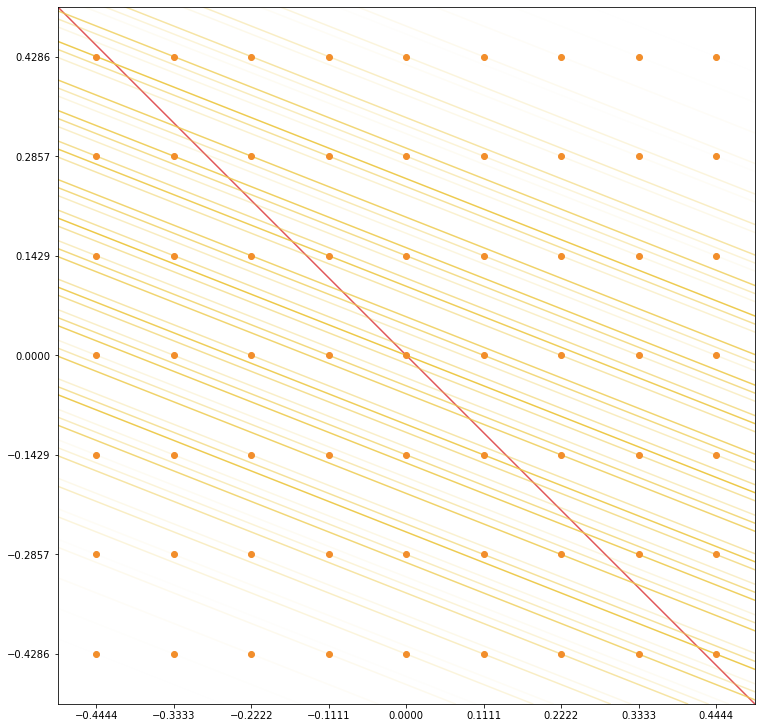

In [14]:
z_a = 13.0
z_b = 33.0
z_r = -17.0
z_f = np.inf

n_a = 9
n_b = 7

xi_a = sampling_coordinates(n_a, 1.0)
xi_b = sampling_coordinates(n_b, 1.0)
xi_ab = np.array(np.meshgrid(xi_a, xi_b)).reshape((2, -1))

fig, ax = pyplot.subplots(constrained_layout=True, figsize=(16, 10))

ax.set_aspect('equal')
ax.set_xticks(xi_a)
ax.set_yticks(xi_b)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

ax.scatter(xi_ab[0], xi_ab[1], color='lfd:signal', zorder=3)
ax.axline([0, 0], frequency_eye_to_display(1.0, 0.0, z_a, z_b, z_r, z_f), color='lfd:retina')

for xi_ab in xi_ab.T:
    xi_r, xi_p = frequency_display_to_eye(xi_ab[0], xi_ab[1], z_a, z_b, z_r, z_f)
    ax.axline(xi_ab, xi_ab + frequency_eye_to_display(0.0, 1.0, z_a, z_b, z_r, z_f), alpha=(1 - abs(xi_p))**3, color='lfd:pupil')

3.0379411764705884


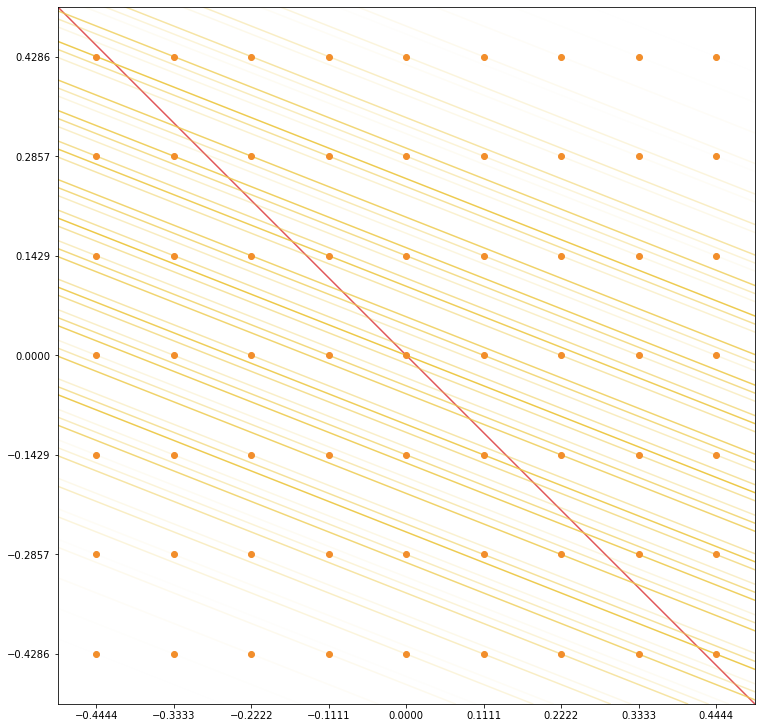

In [17]:
z_a = 13.0
z_b = 33.0
z_r = -17.0
z_f = np.inf

s_p = 5.0
s_r = 5.5

s_a = s_r * z_a / abs(z_r) + s_p
s_b = s_r * z_b / abs(z_r) + s_p

print(abs(z_b/(z_b - z_a)) * s_a/s_p)

n_a = 9
n_b = 7

xi_a = sampling_coordinates(n_a, 1.0)
xi_b = sampling_coordinates(n_b, 1.0)
xi_ab = np.array(np.meshgrid(xi_a, xi_b)).reshape((2, -1))

fig, ax = pyplot.subplots(constrained_layout=True, figsize=(16, 10))

ax.set_aspect('equal')
ax.set_xticks(xi_a)
ax.set_yticks(xi_b)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

ax.scatter(xi_ab[0], xi_ab[1], color='lfd:signal', zorder=3)
ax.axline([0, 0], frequency_eye_to_display(1.0, 0.0, z_a, z_b, z_r, z_f), color='lfd:retina')

for xi_ab in xi_ab.T:
    xi_r, xi_p = frequency_display_to_eye(xi_ab[0], xi_ab[1], z_a, z_b, z_r, z_f)
    ax.axline(xi_ab, xi_ab + frequency_eye_to_display(0.0, 1.0, z_a, z_b, z_r, z_f), alpha=(1 - abs(xi_p))**3, color='lfd:pupil')

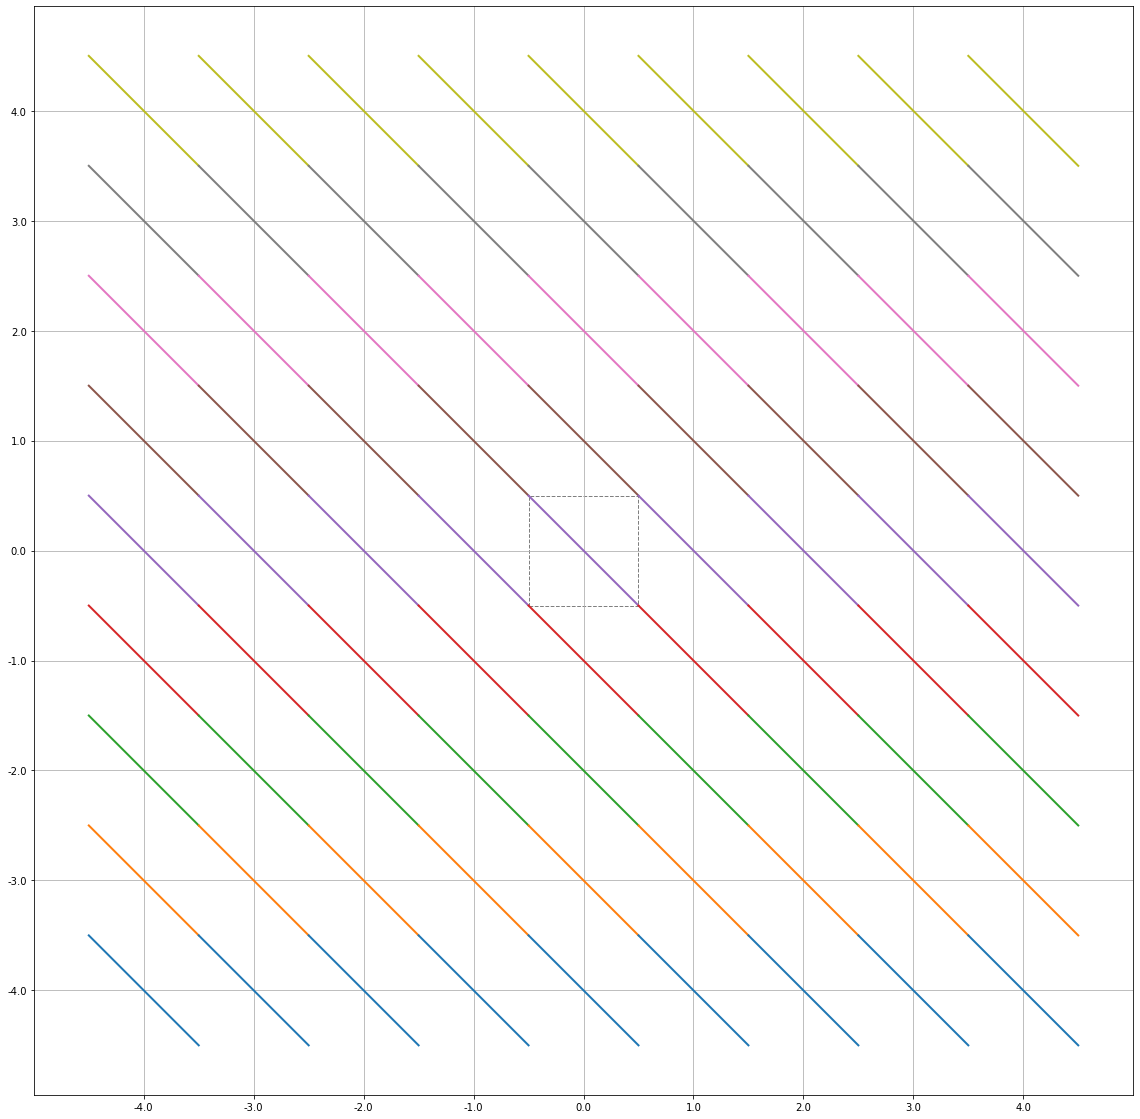

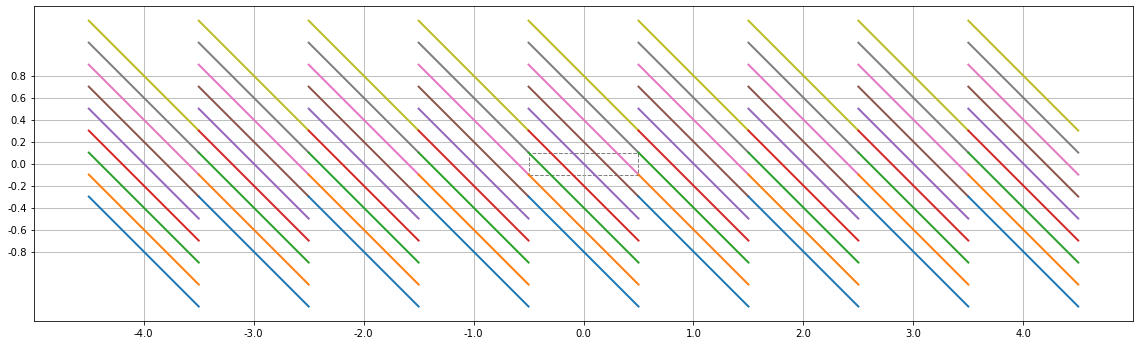

In [5]:
def plot_packing(delta_a, delta_b):
    periodic_a = (np.arange(9) - 4) * delta_a
    periodic_b = (np.arange(9) - 4) * delta_b
    fig, ax = pyplot.subplots(figsize=(16, 32))
    pyplot.tight_layout()
    ax.set_aspect('equal')
    ax.set_xlim(-5.0, 5.0)
    ax.grid(True)
    ax.set_xticks(periodic_a)
    ax.set_yticks(periodic_b)
    ax.xaxis.set_major_formatter(pyplot.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(pyplot.FormatStrFormatter('%.1f'))
    for x_a in periodic_a:
        for x_b in periodic_b:
            ax.plot([x_a + 0.5, x_a - 0.5], [x_b - 0.5, x_b + 0.5], linewidth=2)
        ax.plot([])
    ax.add_patch(pyplot.Rectangle((-delta_a/2, -delta_b/2), delta_a, delta_b, linestyle='dashed', edgecolor='grey', facecolor='none'))

plot_packing(1.0, 1.0)
plot_packing(1.0, 0.2)

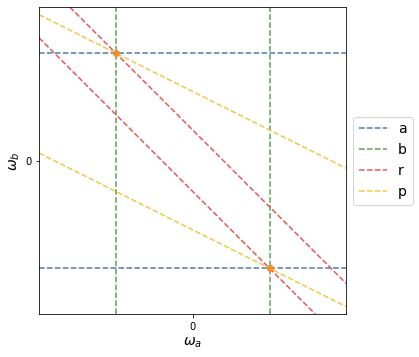

In [6]:
def plot_sinc_lines(ax, omega):
    ax.axhline(omega[1], linestyle='dashed', color='lfd:a')
    ax.axvline(omega[0], linestyle='dashed', color='lfd:b')
    ax.axline(omega, omega + [1, -1], linestyle='dashed', color='lfd:retina')
    ax.axline(omega, omega + [1, -0.5], linestyle='dashed', color='lfd:pupil')
    ax.scatter(omega[0], omega[1], color='lfd:signal', zorder=3)

fig, ax = pyplot.subplots(figsize=(5, 10))
pyplot.tight_layout()
ax.set_xlabel(r'$\omega_a$', fontsize=14)
ax.set_ylabel(r'$\omega_b$', fontsize=14)
ax.set_aspect('equal')
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
plot_sinc_lines(ax, np.array([0.5, -0.7]))
plot_sinc_lines(ax, np.array([-0.5, 0.7]))
_ = ax.legend(['a', 'b', 'r', 'p'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

In [7]:
z_r = -17.0
z_a = 17.0
z_b = 34.0

s_p = 5.0
s_r = 5.0

s_a = s_r * z_a / abs(z_r) + s_p
s_b = s_r * z_b / abs(z_r) + s_p

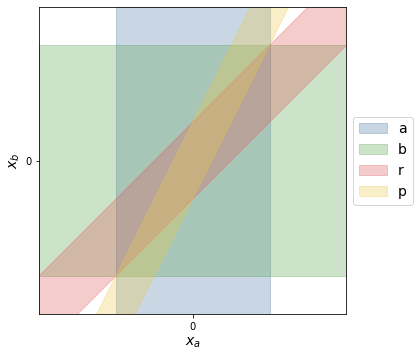

In [8]:
window_a = np.array([-0.5, 0.5]) * s_a
window_b = np.array([-0.5, 0.5]) * s_b
window_r = np.array([-0.5, 0.5]) * s_r
window_p = np.array([-0.5, 0.5]) * s_p

far_ends = np.array([100, -100, -100, 100])

window_r_a = np.repeat(window_r, 2) * z_a / z_r + far_ends
window_r_b = np.repeat(window_r, 2) * z_b / z_r + far_ends

window_p_a = far_ends * z_a / z_r + np.repeat(window_p, 2)
window_p_b = far_ends * z_b / z_r + np.repeat(window_p, 2)

fig, ax = pyplot.subplots(figsize=(5, 10))
pyplot.tight_layout()
ax.set_xlabel(r'$x_a$', fontsize=14)
ax.set_ylabel(r'$x_b$', fontsize=14)
ax.set_aspect('equal')
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_xlim(-10.0, 10.0)
ax.set_ylim(-10.0, 10.0)
ax.fill(np.repeat(window_a, 2), far_ends, alpha=0.3, color='lfd:a', label='a')
ax.fill(far_ends, np.repeat(window_b, 2), alpha=0.3, color='lfd:b', label='b')
ax.fill(window_r_a, window_r_b, alpha=0.3, color='lfd:retina', label='r')
ax.fill(window_p_a, window_p_b, alpha=0.3, color='lfd:pupil', label='p')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

If the display window is bigger than the eye's field of view:
$ \large \begin{align*}
L \cdot \Pi_a \cdot \Pi_b \cdot \Pi_r \cdot \Pi_p &= L \cdot \Pi_r \cdot \Pi_p \\
\widehat{L} * \mathrm{sinc}_a * \mathrm{sinc}_b * \mathrm{sinc}_r * \mathrm{sinc}_p &= \widehat{L} * \mathrm{sinc}_r * \mathrm{sinc}_p \\
\end{align*} $

However, in reality we need to reconstruct the signal before it enters the pupil:
$ \large \begin{align*}
((L \cdot \Pi_a \cdot \Pi_b) * K) \cdot \Pi_r \cdot \Pi_p &= \; ? \\
((\widehat{L} * \mathrm{sinc}_a * \mathrm{sinc}_b) \cdot \widehat{K}) * \mathrm{sinc}_r * \mathrm{sinc}_p &= \; ? \\
\end{align*} $

If we could reconstruct first:
$ \large \begin{align*}
((L * K) \cdot \Pi_a \cdot \Pi_b) \cdot \Pi_r \cdot \Pi_p &= (L * K) \cdot \Pi_r \cdot \Pi_p \\
((\widehat{L} \cdot \widehat{K}) * \mathrm{sinc}_a * \mathrm{sinc}_b) * \mathrm{sinc}_r * \mathrm{sinc}_p &= (\widehat{L} \cdot \widehat{K}) * \mathrm{sinc}_r * \mathrm{sinc}_p \\
\end{align*} $

If we could reconstruct last:
$ \large \begin{align*}
((L \cdot \Pi_a \cdot \Pi_b) \cdot \Pi_r \cdot \Pi_p) * K &= (L \cdot \Pi_r \cdot \Pi_p) * K \\
((\widehat{L} * \mathrm{sinc}_a * \mathrm{sinc}_b) * \mathrm{sinc}_r * \mathrm{sinc}_p) \cdot \widehat{K} &= (\widehat{L} * \mathrm{sinc}_r * \mathrm{sinc}_p) \cdot \widehat{K} \\
\end{align*} $

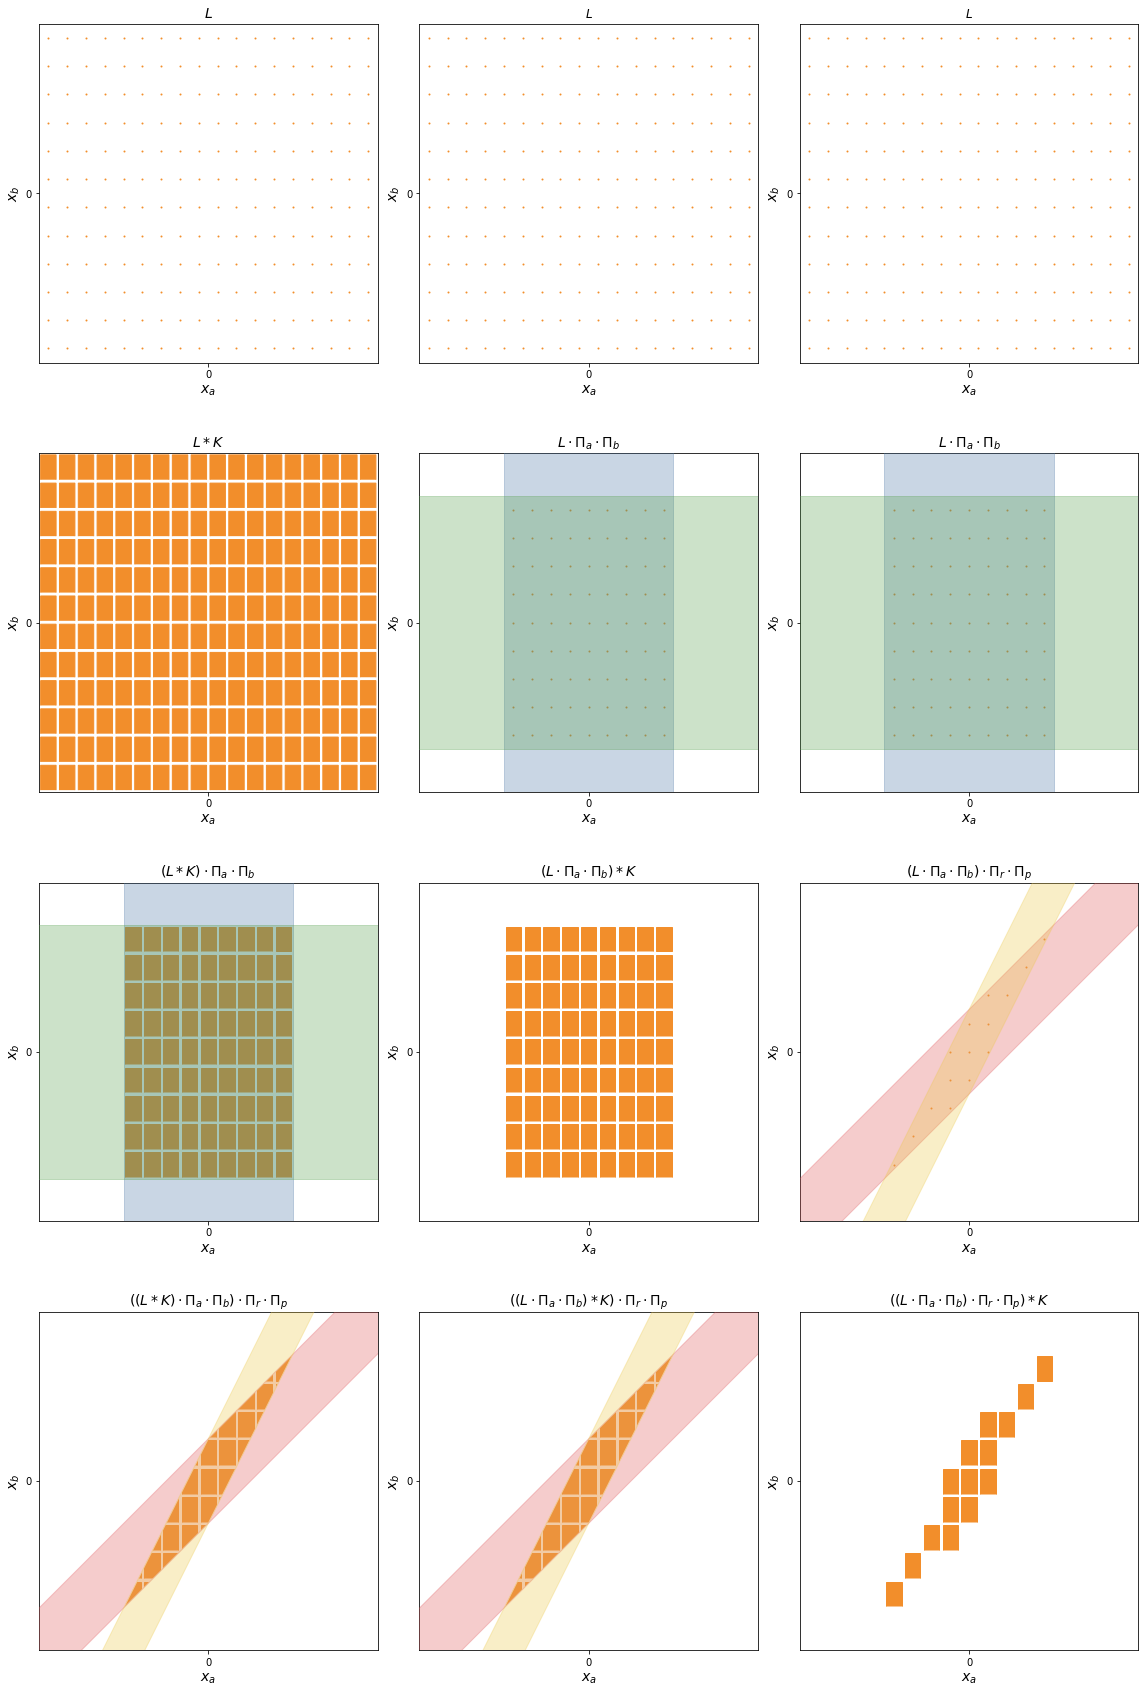

In [9]:
n = 9

x_a = np.tile((np.arange(2*n) - n + 0.5) * s_a/n, 2*n)
x_b = np.repeat((np.arange(2*n) - n + 0.5) * s_b/n, 2*n)

wa_x_a = np.tile((np.arange(n) - n/2 + 0.5) * s_a/n, n)
wa_x_b = np.repeat((np.arange(n) - n/2 + 0.5) * s_b/n, n)

mask_rp = np.logical_and(np.abs(wa_x_b - wa_x_a)*z_r/(z_a - z_b) < s_r/2, np.abs(wa_x_a * z_b - wa_x_b * z_a)/(z_b - z_a) < s_p/2)

corner_a = (s_r * z_a / z_r + s_p)/2
corner_b = (s_r * z_b / z_r + s_p)/2

fig, axs = pyplot.subplots(4, 3, figsize=(16, 24))
pyplot.tight_layout()

axs[0, 0].set_title(r'$L$', fontsize=14)
axs[1, 0].set_title(r'$L * K$', fontsize=14)
axs[2, 0].set_title(r'$(L * K) \cdot \Pi_a \cdot \Pi_b$', fontsize=14)
axs[3, 0].set_title(r'$((L * K) \cdot \Pi_a \cdot \Pi_b) \cdot \Pi_r \cdot \Pi_p$', fontsize=14)

axs[0, 1].set_title(r'$L$')
axs[1, 1].set_title(r'$L \cdot \Pi_a \cdot \Pi_b$', fontsize=14)
axs[2, 1].set_title(r'$(L \cdot \Pi_a \cdot \Pi_b) * K$', fontsize=14)
axs[3, 1].set_title(r'$((L \cdot \Pi_a \cdot \Pi_b) * K) \cdot \Pi_r \cdot \Pi_p$', fontsize=14)

axs[0, 2].set_title(r'$L$')
axs[1, 2].set_title(r'$L \cdot \Pi_a \cdot \Pi_b$', fontsize=14)
axs[2, 2].set_title(r'$(L \cdot \Pi_a \cdot \Pi_b) \cdot \Pi_r \cdot \Pi_p$', fontsize=14)
axs[3, 2].set_title(r'$((L \cdot \Pi_a \cdot \Pi_b) \cdot \Pi_r \cdot \Pi_p) * K$', fontsize=14)

for ax in axs.flat:
    ax.set_xlabel(r'$x_a$', fontsize=14)
    ax.set_ylabel(r'$x_b$', fontsize=14)
    ax.set_aspect('equal')
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlim(-10.0, 10.0)
    ax.set_ylim(-10.0, 10.0)

for ax in axs[(2, 1, 1), (0, 1, 2)]:
    ax.fill(np.repeat(window_a, 2), far_ends, alpha=0.3, color='lfd:a', label='a', zorder=5)
    ax.fill(far_ends, np.repeat(window_b, 2), alpha=0.3, color='lfd:b', label='b', zorder=5)

for ax in axs[(3, 3, 2), (0, 1, 2)]:
    ax.fill(window_r_a, window_r_b, alpha=0.3, color='lfd:retina', label='r', zorder=5)
    ax.fill(window_p_a, window_p_b, alpha=0.3, color='lfd:pupil', label='p', zorder=5)

for ax in axs[0, :]:
    ax.scatter(x_a, x_b, color='lfd:signal', s=1.0, zorder=3)

axs[1, 0].fill(np.repeat(x_a, 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (s_a/n * 0.5 - 0.1), 4*n**2), np.repeat(x_b, 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (s_b/n * 0.5 - 0.1), 4*n**2), color='lfd:signal')

for ax in axs[1, 1:3]:
    ax.scatter(wa_x_a, wa_x_b, color='lfd:signal', s=1.0, zorder=3)

for ax in axs[2:4, 0:2].flat:
    ax.fill(np.repeat(wa_x_a, 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (s_a/n * 0.5 - 0.1), n**2), np.repeat(wa_x_b, 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (s_b/n * 0.5 - 0.1), n**2), color='lfd:signal')

axs[2, 2].scatter(wa_x_a[mask_rp], wa_x_b[mask_rp], color='lfd:signal', s=1.0, zorder=3)

axs[3, 2].fill(np.repeat(wa_x_a[mask_rp], 5) + np.tile(np.array([-1, -1, 1, 1, np.nan]) * (s_a/n * 0.5 - 0.1), 15), np.repeat(wa_x_b[mask_rp], 5) + np.tile(np.array([-1, 1, 1, -1, np.nan]) * (s_b/n * 0.5 - 0.1), 15), color='lfd:signal')

for ax in axs[3, (0, 1)]:
    ax.fill([-10, s_a/2, -corner_a, -s_a/2], [10, s_b/2, -corner_b, -s_b/2], color='white')
    ax.fill([10, -s_a/2, corner_a, s_a/2], [-10, -s_b/2, corner_b, s_b/2], color='white')

In the spatial domain we have:
$$ \large \begin{align*}
    n &= \text{number of spatial samples} \\
    s &= \text{size of the spatial sampling window} \\
    \Delta x &= \text{spatial sampling pitch} \\
\end{align*} $$

In the frequency domain we have:
$$ \large \begin{align*}
    n &= \text{number of frequency samples} \\
    \sigma &= \text{size of the frequency sampling window} \\
    \Delta \xi &= \text{frequency sampling pitch} \\
\end{align*} $$

We can always describe $\Delta x$, $\Delta \xi$ and $\sigma$ in terms of $n$ and $s$:
$$ \large \begin{align*}
    \Delta x &= \frac{s}{n} && (1)\\
    \Delta \xi &= \frac{1}{s} && (2)\\
    \sigma &= \frac{n}{s} && (3)\\
\end{align*} $$

Display frequencies and eye frequencies relate to each other according to:
$$ \large \begin{align*}
    z_{a} \, \xi_{a} + z_{b} \, \xi_{b} &= z_{r} \, \xi_{r} && (4)\\
    (z_{f} - z_{a}) \, \xi_{a} + (z_{f} - z_{b}) \, \xi_{b} &= z_{f} \, \xi_{p} && (5)\\
\end{align*} $$

For a two-dimensional scene it is convenient to choose $z_{f} = \infty$. In addition to simplifying the equations it is also the most comfortable focus distance for the viewer.
$$ \large \begin{align*}
    z_{f} = \infty \implies \xi_{a} + \xi_{b} = \xi_{p} && (6)\\
\end{align*} $$

The $\xi_{r}$ and $\xi_{p}$ axes are defined as $\xi_{p} = 0$ and $\xi_{r} = 0$ respectively. Therefore they can be described in display space as:
$$ \large \begin{align*}
    \xi_{p} = 0 &\implies
    \begin{cases}
        \xi_{a} = \frac{-z_{r}}{z_{b} - z_{a}} \xi_{r} \\
        \xi_{b} = \frac{-z_{r}}{z_{a} - z_{b}} \xi_{r} \\
    \end{cases} && (7)\\
    \xi_{r} = 0 &\implies
    \begin{cases}
        \xi_{a} = \frac{z_{b}}{z_{b} - z_{a}} \xi_{p} \\
        \xi_{b} = \frac{z_{a}}{z_{a} - z_{b}} \xi_{p} \\
    \end{cases} && (8)\\
\end{align*} $$

To avoid interference among spectral replicas due to spectral leakage from the pupil we need:
$$ \large \begin{align*}
    \sigma_{a} = \kappa_{a} \left\lvert \frac{z_{b}}{z_{b} - z_{a}} \right\rvert \Delta\xi_{p} && , \, \kappa_{a} \in \Z^{+} && (9)\\
    \sigma_{b} = \kappa_{b} \left\lvert \frac{z_{a}}{z_{a} - z_{b}} \right\rvert \Delta\xi_{p} && , \, \kappa_{b} \in \Z^{+} && (10)\\
\end{align*} $$

Which in terms of $n$ and $s$ becomes:
$$ \large \begin{align*}
    n_{a} = \kappa_{a} \left\lvert \frac{z_{b}}{z_{b} - z_{a}} \right\rvert \frac{s_{a}}{s_{p}} && (11)\\
    n_{b} = \kappa_{b} \left\lvert \frac{z_{a}}{z_{a} - z_{b}} \right\rvert \frac{s_{b}}{s_{p}} && (12)\\
\end{align*} $$

To separate spectral replicas over the $\xi_{a}$ axis regardless of the choice of $\sigma_{b}$ (i.e. the naive method) we need:
$$ \large \begin{align*}
    \sigma_{a} \geq \left\lvert \frac{z_{r}}{z_{b} - z_{a}} \right\rvert \sigma_{r} && (13)\\
\end{align*} $$

Which in terms of $n$ and $s$ becomes:
$$ \large \begin{align*}
    n_{a} \geq \left\lvert \frac{z_{r}}{z_{b} - z_{a}} \right\rvert \frac{s_{a}}{s_{r}} \, n_{r} && (14)\\
\end{align*} $$

From $(11)$ and $(14)$ we have:
$$ \large \begin{align*}
    \kappa_{a} \left\lvert \frac{z_{b}}{z_{b} - z_{a}} \right\rvert \frac{s_{a}}{s_{p}} \geq \left\lvert \frac{z_{r}}{z_{b} - z_{a}} \right\rvert \frac{s_{a}}{s_{r}} \, n_{r} &&
    \therefore && \frac{1}{s_{p}} \geq \left\lvert \frac{z_{r}}{z_{b}} \right\rvert \frac{1}{s_{r} \, \kappa_{a}} \, n_{r} && (15)\\
\end{align*} $$

From $(12)$ and $(15)$ we have:
$$ \large \begin{align*}
    n_{b} \geq \left\lvert \frac{z_{a}}{z_{a} - z_{b}} \right\rvert \left\lvert \frac{z_{r}}{z_{b}} \right\rvert \frac{s_{b} \, \kappa_{b}}{s_{r} \, \kappa_{a}} \, n_{r} && (16)\\
\end{align*} $$

To keep the display window bigger than the eye's field of view we need:
$$ \large \begin{align*}
    s_{a} \geq s_{p} + \left\lvert \frac{z_{a}}{z_{r}} \right\rvert s_{r} && (17)\\
    s_{b} \geq s_{p} + \left\lvert \frac{z_{b}}{z_{r}} \right\rvert s_{r} && (18)\\
\end{align*} $$

Combining $(14)$ with $(17)$ and $(16)$ with $(18)$ we have:
$$ \large \begin{align*}
    n_{a} &\geq \frac{n_{r}}{\lvert z_{b} - z_{a} \rvert} \left( \lvert z_{a} \rvert + \frac{s_{p}}{s_{r}} \lvert z_{r} \rvert \right) && (19)\\
    n_{b} &\geq \frac{n_{r}}{\lvert z_{b} - z_{a} \rvert} \left( \lvert z_{a} \rvert + \frac{s_{p}}{s_{r}} \lvert z_{r} \rvert \frac{\lvert z_{a} \rvert}{\lvert z_{b} \rvert} \right) \frac{\kappa_{b}}{\kappa_{a}} && (20)\\
\end{align*} $$

<br>

Choosing $z_{f} = \infty$:

(3) &nbsp; $\omega_{a} + \omega_{b} = \omega_{p}$

<br>

To avoid spectral leakage we need:

(6) &nbsp; $\sigma_{a} = \kappa_{ar} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} \;$ , $\; \kappa_{ar} \in \mathbb{Z}^{+}$

(7) &nbsp; $\sigma_{b} = \kappa_{br} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} \;$ , $\; \kappa_{br} \in \mathbb{Z}^{+}$

(8) &nbsp; $\sigma_{a} = \kappa_{ap} \frac{z_{b}}{z_{b} - z_{a}} \Delta\omega_{p} \;$ , $\; \kappa_{ap} \in \mathbb{Z}^{+}$

(9) &nbsp; $\sigma_{b} = \kappa_{bp} \frac{z_{a}}{z_{b} - z_{a}} \Delta\omega_{p} \;$ , $\; \kappa_{bp} \in \mathbb{Z}^{+}$

<br>

Therefore:

(10) &nbsp; $z_{a} = -z_{r} \frac{\kappa_{br}}{\kappa_{bp}} \frac{\Delta \omega_{r}}{\Delta \omega_{p}} = -z_{r} \frac{\kappa_{br}}{\kappa_{bp}} \frac{s_{p}}{s_{r}}$

(11) &nbsp; $z_{b} = -z_{r} \frac{\kappa_{ar}}{\kappa_{ap}} \frac{\Delta \omega_{r}}{\Delta \omega_{p}} = -z_{r} \frac{\kappa_{ar}}{\kappa_{ap}} \frac{s_{p}}{s_{r}}$

<br>

Choosing to space spectral replicas over the $\omega_{a}$ axis according to the naive method:

(12) &nbsp; $\sigma_{a} \geq \frac{-z_{r}}{z_{b} - z_{a}} \sigma_{r} = n_{r} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r}$

<br>

Choosing $\kappa_{ar} = n_{r}$:

(13) &nbsp; $z_{b} = -z_{r} \frac{n_{r}}{\kappa_{ap}} \frac{s_{p}}{s_{r}}$

<br>

Choosing $\kappa_{bp} = 1$:

(14) &nbsp; $z_{a} = -z_{r} \, \kappa_{br} \frac{s_{p}}{s_{r}}$

<br>

Keep in mind that:

(15) &nbsp; $z_{b} > z_{a} \implies n_{r} > \kappa_{ap} \, \kappa_{br}$

(16) &nbsp; $z_{b} - z_{a} = -z_{r} (\frac{n_{r}}{\kappa_{ap}} - \kappa_{br}) \frac{s_{p}}{s_{r}}$

(17) &nbsp; $\frac{-z_{r}}{z_{b} - z_{a}} = \frac{\kappa_{ap}}{n_{r} - \kappa_{ap} \, \kappa_{br}} \frac{s_{r}}{s_{p}}$

<br>

To keep the display window bigger than the eye's field of view, we need:

(18) &nbsp; $s_{a} \geq \frac{z_{a}}{-z_{r}} s_{r} + s_{p} = (\kappa_{br} + 1) \, s_{p}$

(19) &nbsp; $s_{b} \geq \frac{z_{b}}{-z_{r}} s_{r} + s_{p} = (\frac{n_{r}}{\kappa_{ap}} + 1) \, s_{p}$

<br>

The display resolution is then restricted to:

(20) &nbsp; $n_{a} = s_{a} \, \sigma_{a} \geq (\kappa_{br} + 1) \, s_{p} \, n_{r} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} = (\kappa_{br} + 1) \, n_{r} \frac{\kappa_{ap}}{n_{r} - \kappa_{ap} \, \kappa_{br}}$
$= \frac{n_{r} \, \kappa_{ap} \, \kappa_{br} + n_{r} \, \kappa_{ap}}{n_{r} - \kappa_{ap} \, \kappa_{br}}$

(21) &nbsp; $n_{b} = s_{b} \, \sigma_{b} \geq (\frac{n_{r}}{\kappa_{ap}} + 1) \, s_{p} \, \kappa_{br} \frac{-z_{r}}{z_{b} - z_{a}} \Delta\omega_{r} = (\frac{n_{r}}{\kappa_{ap}} + 1) \, \kappa_{br} \frac{\kappa_{ap}}{n_{r} - \kappa_{ap} \, \kappa_{br}}$
$= \frac{n_{r} \, \kappa_{br} + \kappa_{ap} \, \kappa_{br}}{n_{r} - \kappa_{ap} \, \kappa_{br}}$

<br>

Choosing $\kappa_{br} = 1$:

(22) &nbsp; $n_{a} \geq 2 \frac{n_{r} \, \kappa_{ap}}{n_{r} - \kappa_{ap}}$

(23) &nbsp; $n_{b} \geq \frac{n_{r} + \kappa_{ap}}{n_{r} - \kappa_{ap}}$

(24) &nbsp; $z_{a} = -z_{r} \frac{s_{p}}{s_{r}}$

<br>

Let $\kappa_{ap} = n_{r} - \eta$ , $\eta \in \mathbb{Z} \cap [1, \, n_{r} - 1]$:

(25) &nbsp; $n_{a} \geq 2 \frac{n_{r} \, (n_{r} - \eta)}{\eta} = 2 (\frac{n_{r}^{2}}{\eta} - n_{r})$

(26) &nbsp; $n_{b} \geq \frac{n_{r} + (n_{r} - \eta)}{\eta} = 2 \frac{n_{r}}{\eta} - 1$

(27) &nbsp; $z_{b} = -z_{r} \frac{n_{r}}{n_{r} - \eta} \frac{s_{p}}{s_{r}} = \frac{n_{r}}{n_{r} - \eta} z_{a}$

<br>

For $n_{r} = 256$ and $\eta = 1$:

$n_{a} \geq 130560$

$n_{b} \geq 511$

$z_{b} = 1.003921568627451 \, z_{a}$

<br>

For $n_{r} = 256$ and $\eta = 128$:

$n_{a} \geq 512$

$n_{b} \geq 3$

$z_{b} = 2 \, z_{a}$

<br>

For $n_{r} = 256$ and $\eta = 255$:

$n_{a} \geq 2.007843137254895$

$n_{b} \geq 1.007843137254902$

$z_{b} = 256 \, z_{a}$

In [10]:
n_r = 256
n_a = 512
n_b = 3

pass